In [1]:
import ast
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import re

In [2]:
df = pd.read_csv("resultadoExperimento.csv")

In [3]:
df['area_diff'] = df['area_new'] - df['area_avg']
df['area_diff_%'] = ((df['area_new'] - df['area_avg']) / df['area_avg']) * 100

In [4]:
df[df["area_diff"]>0]

,config,i,n_abstracts,proposed,metrics_avg,metrics_new,delta_metrics,area_avg,area_new,area_diff,area_diff_%
0,"[0, 0, 0, 6]",1,['Introduction. At enterprises engaged in the ...,<|begin_of_text|>The management of tailings fr...,"[0.32198221796783044, 0.7396463851412207, 0.70...","[0.37072804784667945, 0.6771454367918103, 0.74...","[0.04874582987884901, -0.06250094834941045, 0....",1.455671,2.670345,1.214674,83.444277
1,"[0, 0, 0, 6]",2,['Introduction. At enterprises engaged in the ...,<|begin_of_text|>The mining and metallurgical ...,"[0.32198221796783044, 0.7396463851412207, 0.70...","[0.3368909286202238, 0.7114800300148129, 0.587...","[0.014908710652393353, -0.02816635512640786, -...",2.103497,2.381377,0.277880,13.210361
3,"[0, 0, 0, 6]",4,['Introduction. At enterprises engaged in the ...,<|begin_of_text|>The extraction and processing...,"[0.32198221796783044, 0.7396463851412207, 0.70...","[0.33340947047843017, 0.7150408682492451, 0.53...","[0.011427252510599728, -0.024605516891975654, ...",1.845898,2.265894,0.419996,22.752910
4,"[0, 0, 0, 6]",5,['Introduction. At enterprises engaged in the ...,<|begin_of_text|>The extraction and processing...,"[0.32198221796783044, 0.7396463851412207, 0.70...","[0.32508528442525286, 0.7367889247221633, 0.69...","[0.003103066457422421, -0.0028574604190574338,...",2.417101,2.696617,0.279516,11.564093
6,"[0, 0, 0, 6]",7,['Introduction. At enterprises engaged in the ...,"<|begin_of_text|>Tailings, the materials left ...","[0.32198221796783044, 0.7396463851412207, 0.70...","[0.3333647086858069, 0.721608143953863, 0.8922...","[0.011382490717976479, -0.01803824118735775, 0...",1.835512,2.717343,0.881831,48.042814
...,...,...,...,...,...,...,...,...,...,...,...
718,"[3, 2, 1, 6]",6,"['Increasing population levels, growing econom...",Tailings are the by-products of mineral proces...,"[0.33337160713033337, 0.7298084236314522, 0.74...","[0.37636330409358154, 0.6725173155338001, 0.72...","[0.04299169696324817, -0.05729110809765203, -0...",1.844947,2.625184,0.780237,42.290510
719,"[3, 2, 1, 6]",7,"['Increasing population levels, growing econom...",Tailings are the by-products of mineral proces...,"[0.33337160713033337, 0.7298084236314522, 0.74...","[0.34678090103967074, 0.7071707264564787, 0.76...","[0.013409293909337372, -0.022637697174973437, ...",2.494063,2.647978,0.153915,6.171263
720,"[3, 2, 1, 6]",8,"['Increasing population levels, growing econom...",Tailings are the by-products of mineral proces...,"[0.33337160713033337, 0.7298084236314522, 0.74...","[0.34544838953096885, 0.706460199646357, 0.734...","[0.012076782400635477, -0.023348223985095173, ...",2.268358,2.619035,0.350677,15.459506
728,"[3, 2, 1, 6]",16,"['Increasing population levels, growing econom...","Tailings, the by-products of mineral processin...","[0.33337160713033337, 0.7298084236314522, 0.74...","[0.3518079412496966, 0.697253330913082, 0.6710...","[0.01843633411936324, -0.032555092718370204, -...",2.148476,2.464140,0.315664,14.692457


In [5]:
metrics = [
    'Global_Efficiency', 'Avg_Edge_Betweenness', 'Spectral_Radius',
    'Spectral_Gap', 'Natural_Connectivity', 'Algebraic_Connectivity',
    'Conductance'
]

for col in ['metrics_avg', 'metrics_new', 'delta_metrics']:
    df[col] = df[col].apply(eval)  # Convert string representation of list to actual list
    df[[f"{col}_{m}" for m in metrics]] = pd.DataFrame(df[col].tolist(), index=df.index)

# Create the new DataFrame with selected columns
new_df = df[['config', 'i'] + 
           [f"metrics_avg_{m}" for m in metrics] +
           [f"metrics_new_{m}" for m in metrics]]

In [6]:
area_analysis = df.groupby('config').agg({
    'area_diff': ['mean', 'std', 'min', 'max', 'median']
})

# Renombrar columnas para mejor legibilidad
area_analysis.columns = ['_'.join(col).strip() for col in area_analysis.columns.values]

# Reordenar columnas
column_order = [
    'area_diff_mean', 'area_diff_std', 'area_diff_min', 'area_diff_max', 
    'area_diff_median'
]

area_analysis = area_analysis[column_order]

# Resetear índice para que 'config' sea columna nuevamente
area_analysis = area_analysis.reset_index()

In [7]:
area_analysis

,config,area_diff_mean,area_diff_std,area_diff_min,area_diff_max,area_diff_median
0,"[0, 0, 0, 6]",0.353646,0.610916,-1.223957,1.264269,0.348224
1,"[0, 0, 1, 6]",-1.073671,0.437040,-1.674901,0.053826,-1.200918
2,"[0, 1, 0, 6]",1.011285,0.415762,0.208443,1.636735,1.084389
3,"[0, 1, 1, 6]",-0.164670,0.624755,-1.223361,0.856078,-0.261875
4,"[0, 2, 0, 6]",0.462580,0.643608,-0.949311,1.553231,0.528870
5,"[0, 2, 1, 6]",-0.103200,0.863416,-1.541317,1.381083,-0.077556
6,"[1, 0, 0, 6]",-0.215337,0.759520,-1.756150,1.335823,-0.250176
7,"[1, 0, 1, 6]",-1.682665,0.153863,-1.897780,-1.110041,-1.722062
8,"[1, 1, 0, 6]",-0.025335,0.739928,-1.223404,1.480098,0.007543
9,"[1, 1, 1, 6]",-0.585940,0.616179,-1.500272,0.956264,-0.763783


In [8]:
base_metrics = [
    'Global_Efficiency',
    'Avg_Edge_Betweenness',
    'Spectral_Radius',
    'Spectral_Gap',
    'Natural_Connectivity',
    'Algebraic_Connectivity',
    'Conductance'
]

# Crear un DataFrame para almacenar los resultados
results = []

#TODO: no agrupar
#----------------
# Agrupar por config
grouped = new_df.groupby('config')

for config, group in grouped:
    # Diccionario para almacenar resultados de esta configuración
    config_result = {'config': config}
    
    for metric in base_metrics:
        avg_col = f'metrics_avg_{metric}'
        new_col = f'metrics_new_{metric}'
        
        # Calcular diferencia
        diff = group[avg_col] - group[new_col]
        
        # Almacenar media y desviación estándar
        config_result[f'{metric}_diff_mean'] = diff.mean()
        config_result[f'{metric}_diff_std'] = diff.std()
    
    results.append(config_result)

# Convertir a DataFrame
result_df = pd.DataFrame(results)

In [9]:
result_df

,config,Global_Efficiency_diff_mean,Global_Efficiency_diff_std,Avg_Edge_Betweenness_diff_mean,Avg_Edge_Betweenness_diff_std,Spectral_Radius_diff_mean,Spectral_Radius_diff_std,Spectral_Gap_diff_mean,Spectral_Gap_diff_std,Natural_Connectivity_diff_mean,Natural_Connectivity_diff_std,Algebraic_Connectivity_diff_mean,Algebraic_Connectivity_diff_std,Conductance_diff_mean,Conductance_diff_std
0,"[0, 0, 0, 6]",-0.007757,0.022808,0.018043,0.023834,0.006314,0.119374,-0.008632,0.008761,0.003744,0.025768,-0.000925,0.001037,-0.001643,0.004795
1,"[0, 0, 1, 6]",0.029037,0.017609,-0.028107,0.021607,0.035752,0.119098,0.008554,0.007466,0.018986,0.026599,0.001585,0.000687,0.010987,0.004314
2,"[0, 1, 0, 6]",-0.030315,0.019616,0.038370,0.022623,-0.232607,0.174139,-0.011847,0.010208,-0.052275,0.040155,-0.001591,0.001295,-0.007642,0.005088
3,"[0, 1, 1, 6]",-0.002386,0.018064,0.006895,0.021379,-0.147602,0.185129,0.001589,0.008122,-0.023672,0.038389,0.000701,0.000997,0.003432,0.004622
4,"[0, 2, 0, 6]",-0.010127,0.027990,0.011796,0.027640,-0.007438,0.106285,-0.005287,0.009083,-0.007135,0.028110,-0.001289,0.001651,-0.007050,0.007965
5,"[0, 2, 1, 6]",-0.004115,0.031183,0.001229,0.035093,-0.055594,0.156057,0.002187,0.009347,-0.014569,0.041321,0.000084,0.001503,-0.001454,0.008878
6,"[1, 0, 0, 6]",0.009744,0.030574,-0.010659,0.032940,0.130066,0.065286,-0.000999,0.008111,0.024680,0.016305,-0.000612,0.001308,-0.002246,0.007452
7,"[1, 0, 1, 6]",0.055994,0.017968,-0.062001,0.021414,0.193221,0.060866,0.015724,0.002828,0.051194,0.010257,0.002246,0.000294,0.015641,0.003247
8,"[1, 1, 0, 6]",-0.002525,0.026484,0.013331,0.026303,0.048709,0.081747,-0.005690,0.009294,0.015288,0.018767,-0.000598,0.001427,0.000280,0.007893
9,"[1, 1, 1, 6]",0.012390,0.017776,0.001084,0.022708,0.065700,0.106475,-0.002528,0.010310,0.027250,0.020751,0.000613,0.001081,0.008275,0.005481


In [10]:
from scipy.stats import shapiro, kstest, norm

numeric_cols = ['area_avg', 'area_new']

for col in numeric_cols:
    stat, p = shapiro(df[col])
    print(f'Columna: {col}')
    print(f'Estadístico de prueba: {stat:.4f}')
    print(f"area10 p-value exacto: {p:.20f}")
    if p > 0.05:
        print('Resultado: Distribución normal (no se rechaza H0)')
    else:
        print('Resultado: Distribución no normal (se rechaza H0)')
    print('-' * 50)

Columna: area_avg
Estadístico de prueba: 0.8974
area10 p-value exacto: 0.00000000000000000000
Resultado: Distribución no normal (se rechaza H0)
--------------------------------------------------
Columna: area_new
Estadístico de prueba: 0.8198
area10 p-value exacto: 0.00000000000000000000
Resultado: Distribución no normal (se rechaza H0)
--------------------------------------------------


In [11]:
for col in numeric_cols:
    stat, p = kstest(df[col], 'norm', args=(df[col].mean(), df[col].std()))
    print(f'KS-test para {col}: p = {p:.10f}')

KS-test para area_avg: p = 0.0000000000
KS-test para area_new: p = 0.0000000000


In [12]:
from scipy.stats import kruskal

# Calcular la diferencia de áreas
#topk['area_diff'] = topk['area_new'] - topk['area_avg']

# Obtener todas las configuraciones únicas
configuraciones = df['config'].unique()

# Almacenar resultados
resultados_kw = []

# Realizar test para cada combinación de configuraciones
for config in configuraciones:
    # Filtrar datos para la configuración actual
    datos_config = df[df['config'] == config]['area_diff']

    # Realizar test de Kruskal-Wallis contra el resto de configuraciones
    datos_resto = df[df['config'] != config]['area_diff']

    if len(datos_config) > 1:  # Necesitamos al menos 2 muestras
        stat, p = kruskal(datos_config, datos_resto)
        resultados_kw.append({
            'Configuración': config,
            'Estadístico H': stat,
            'Valor p': p,
            'Significativo (p < 0.05)': p < 0.05
        })

# Convertir resultados a DataFrame
resultados_df = pd.DataFrame(resultados_kw)

# Mostrar resultados ordenados por valor p
print(resultados_df.sort_values(by='Valor p'))

   Configuración  Estadístico H       Valor p  Significativo (p < 0.05)
7   [1, 0, 1, 6]      86.304035  1.542934e-20                      True
16  [2, 2, 0, 6]      52.373229  4.589379e-13                      True
1   [0, 0, 1, 6]      48.434561  3.414964e-12                      True
14  [2, 1, 0, 6]      42.742624  6.243686e-11                      True
19  [3, 0, 1, 6]      37.730773  8.121324e-10                      True
12  [2, 0, 0, 6]      37.625973  8.569578e-10                      True
15  [2, 1, 1, 6]      31.480016  2.015035e-08                      True
2   [0, 1, 0, 6]      30.444529  3.435509e-08                      True
11  [1, 2, 1, 6]      21.880418  2.901800e-06                      True
9   [1, 1, 1, 6]      19.746887  8.840555e-06                      True
23  [3, 2, 1, 6]      12.796920  3.471906e-04                      True
20  [3, 1, 0, 6]      10.033180  1.537453e-03                      True
17  [2, 2, 1, 6]       8.661284  3.250421e-03                   

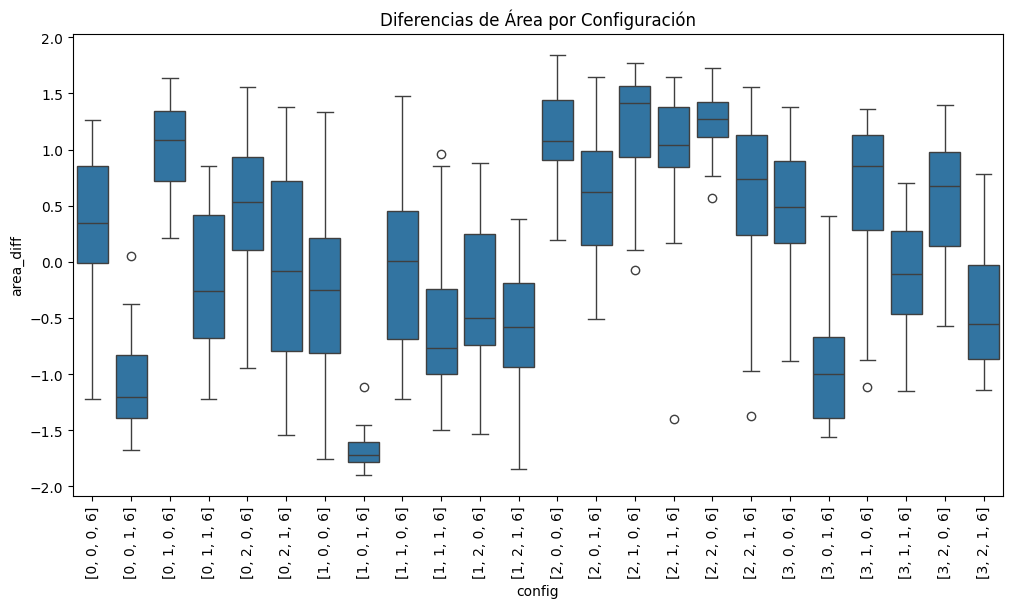

In [13]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='config', y='area_diff', data=df)
plt.xticks(rotation=90)
plt.title('Diferencias de Área por Configuración')
plt.show()

In [14]:
#result_df.to_csv("resumen_metricas_por_config.csv")
#area_analysis.to_csv("resumen_diff_area_por_config.csv")